In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("Social_Network_Ads.csv")

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
df=df.iloc[:,2:]


In [24]:
df.sample(5)


,Age,EstimatedSalary,Purchased
267,37,74000,0
111,37,71000,0
309,38,50000,0
232,40,107000,1
10,26,80000,0


# Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler X_new = (X - mean)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # standarlization X_new = (X - mean)/Standard daviation

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)        # learn from tranning set


# transform train and test sets
X_train_scaled = scaler.transform(X_train)  # above formula is apply here
X_test_scaled = scaler.transform(X_test)    # above formula is apply here

In [10]:
scaler.mean_          # it calculated the mean of both data train data 

array([3.78642857e+01, 6.98071429e+04])

In [36]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
X_test_scaled

array([[-0.77101313,  0.49720103],
       [ 0.0133054 , -0.57280368],
       [-0.28081405,  0.15017248],
       [-0.77101313,  0.26584866],
       [-0.28081405, -0.57280368],
       [-1.06513258, -1.44037507],
       [-0.67297331, -1.5849703 ],
       [-0.18277423,  2.14558666],
       [-1.94749093, -0.05226085],
       [ 0.89566375, -0.775237  ],
       [-0.77101313, -0.60172273],
       [-0.96709276, -0.42820845],
       [-0.08473441, -0.42820845],
       [ 0.11134522,  0.20801057],
       [-1.7514113 ,  0.46828198],
       [-0.5749335 ,  1.36477242],
       [-0.08473441,  0.20801057],
       [-1.84945111,  0.43936294],
       [ 1.67998229,  1.74072002],
       [-0.28081405, -1.38253697],
       [-0.28081405, -0.65956082],
       [ 0.89566375,  2.14558666],
       [ 0.30742485, -0.54388463],
       [ 0.89566375,  1.01774386],
       [-1.45729185, -1.2090227 ],
       [ 1.09174339,  2.05882953],
       [-0.96709276,  0.49720103],
       [-0.86905295,  0.29476771],
       [-0.08473441,

In [43]:
# After the formula is apply the the dataframe turn into numpy array 
# but we want data in dataframe so me convert it into pandas dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [44]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [15]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [16]:
np.round(X_train.describe(),1)        # Qriginal dataset description

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


### 

In [17]:
np.round(X_train_scaled.describe(),1)      # Scaled dataset

,0,1
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scalling

[]

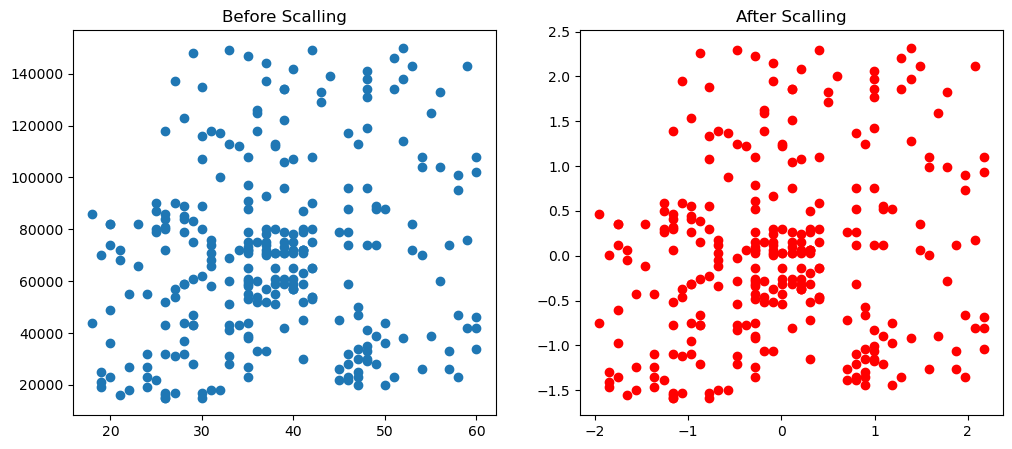

In [51]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scalling")
ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])

ax2.set_title("After Scalling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="red")

plt.plot()

# There is no difference between after and befor because it onle change the vale of scale not the value of the data it decresse the varidation beteen the data 

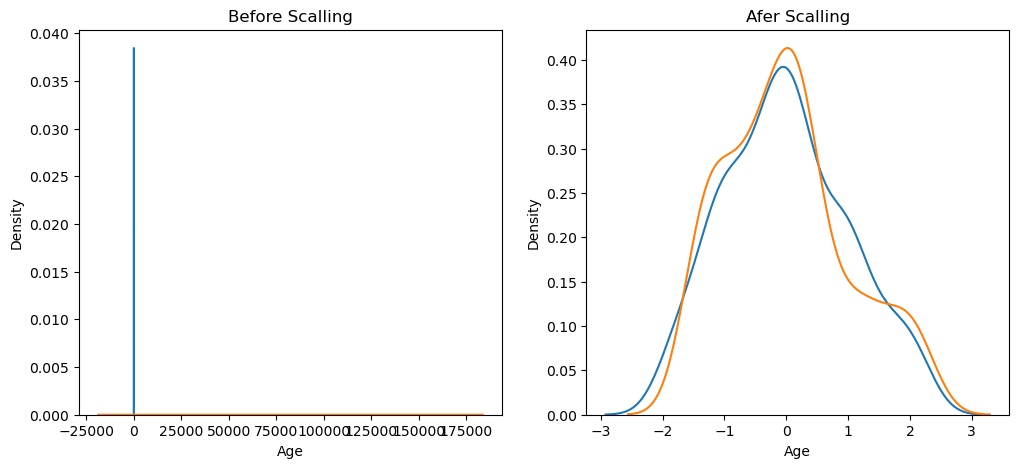

In [46]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#Before scaling
ax1.set_title("Before Scalling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

#After scling

ax2.set_title("Afer Scalling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()

# Comparision of Distribution 

[]

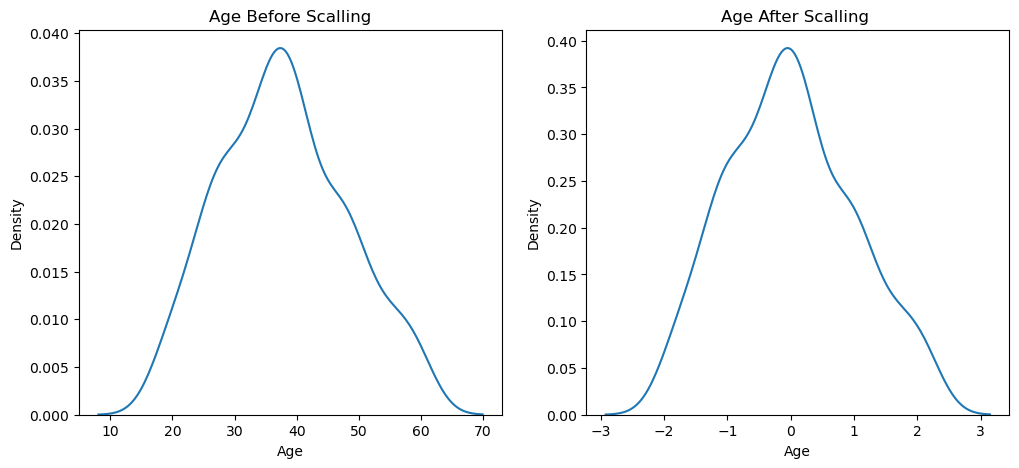

In [54]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Age Before Scalling")
sns.kdeplot(X_train["Age"], ax=ax1)

ax2.set_title("Age After Scalling ")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)

plt.plot()


# Data always remain same ever after Standarlization 
# There is no difference between after and befor because it onle change the vale of scale not the value of the data it decresse the varidation beteen the data 

# Why Scalling is important

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr =  LogisticRegression()
lr_scaled = LogisticRegression()

In [57]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [58]:
y_pre = lr.predict(X_test)
y_pre_scaled = lr_scaled.predict(X_test_scaled)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
print("Actual",accuracy_score(y_test,y_pre))
print("Scaled",accuracy_score(y_test,y_pre_scaled))

Actual 0.875
Scaled 0.8666666666666667
